![Universidad Central](https://ci5.googleusercontent.com/proxy/odjW-5hdeABL3cNkS_jRq7hfTaOj3kogZlR7ki7Gxc8N9jO9NGjFBrmMV1PNhhp71yWA5AD00JVBzJJiYoQ0ytAWXTFtqrLDDp9fK44h742TjOy48Pku7G8PPyg=s0-d-e1-ft#http://comunicaciones.ucentral.edu.co/firmas/2022/universidad-central.png)

> Taller Naive-Bayes Dataset: "adult".<br>
> Docente: Wilson Sandoval R.<br>
> Presentado por: Jonatan Leonardo Zabala Gallego. jzabalag@ucentral.edu.co.<br>

> Maestría en Analítica de Datos <br>
> Curso de Métodos estadísticos para analítica de datos <br>
> Facultad de Ingeniería y Ciencias Básicas <br>
> Universidad Central <br>

## Descripción del dataset:

El dataset 'adult' se encuentra alojado en el repositorio UCI Machine Learning, este conjunto de datos se ha utilizado en una variedad de trabajos de investigación y proyectos prácticos en el campo del aprendizaje automático y la minería de datos. 

'https://archive.ics.uci.edu/ml/datasets/Adult'

Este dataset está compuesto por una serie de registros relacionados con un censo realizado en Estados Unidos en el año 1994, la extracción fue realizada por Barry Becker y la fuente original de los datos se encuentra en http://www.census.gov/ftp/pub/DES/www/welcome.html

El dataset original ha sido dividido en un conjunto de entrenamiento y otro de prueba. El dataset original se compone de 15 variables y 48.842 observaciones.

En primer lugar, realizaremos un análisis descriptivo del dataset original (48.842 registros) y luego usaremos las particiones de entrenamiento y prueba para entrenar el modelo y realizar la predicción.

**El objetivo de este estudio es determinar por medio de la aplicación del método de clasificación Naive-Bayes si una persona gana más de 50K al año.**

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Cargar el conjunto de datos de entrenamiento
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
adult_df = pd.read_csv(url, header=None, names=column_names)

In [2]:
# Cargar el conjunto de datos de test
url2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
column_names2 = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
adult_test = pd.read_csv(url2, header=None, names=column_names2, skiprows=1)

In [3]:
# Concatenar los dos dataframes
adult_data = pd.concat([adult_df, adult_test], axis=0)

In [4]:
#Dimensión del datset de entrenamiento.
print(adult_df.shape)

(32561, 15)


In [5]:
#Dimensión del datset de prueba.
print(adult_test.shape)

(16281, 15)


In [6]:
#Dimensión del datset combinado
print(adult_data.shape)

(48842, 15)


## Objetivo general.

El objetivo principal será predecir si una persona gana más de 50K al año a partir de las variables predictivas, en este sentido la variable de respuesta será 'income'.

## Análisis exploratorio del dataset 'adult_data'.

El dataset 'adult_data' es la combinación entre el conjunto de datos de entrenamiento (32561, 15) y el conjunto de datos de prueba (16281, 15).

El conjunto de datos se compone de 15 variables de entrada que son una mezcla de tipos de datos categóricos, ordinales y numéricos. La lista completa de variables es la siguiente:

- Edad ~ age
- Clase de trabajo ~ workclass.
- Peso final ~ fnlwgt.
- Educación ~ education.
- Número de años de educación ~ education_num.
- Estado civil ~ marital_status.
- Ocupación ~ occupation.
- Parentesco ~ relationship.
- Raza ~ race.
- Sexo ~ sex.
- Ganancia de capital ~ capital_gain.
- Pérdida de capital ~ capital_loss.
- Horas semanales ~ hours_per_week.
- País de origen ~ native_country.
- Ingreso ~ income
 

In [7]:
adult_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
adult_data.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [9]:
# Obtener información general del conjunto de datos
print(adult_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB
None


In [10]:
# Hallar los datos nulos.
adult_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
# Obtener estadísticas descriptivas para las variables numéricas
print(adult_data.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [12]:
# Crear un diccionario de tablas para cada variable categórica
tables = {}
tables['workclass'] = pd.DataFrame(adult_data['workclass'].value_counts())
tables['education'] = pd.DataFrame(adult_data['education'].value_counts())
tables['marital_status'] = pd.DataFrame(adult_data['marital_status'].value_counts())
tables['occupation'] = pd.DataFrame(adult_data['occupation'].value_counts())
tables['relationship'] = pd.DataFrame(adult_data['relationship'].value_counts())
tables['race'] = pd.DataFrame(adult_data['race'].value_counts())
tables['sex'] = pd.DataFrame(adult_data['sex'].value_counts())
tables['native_country'] = pd.DataFrame(adult_data['native_country'].value_counts())
tables['income'] = pd.DataFrame(adult_data['income'].value_counts())

# Imprimir cada tabla
for table_name, table in tables.items():
    print(f"Tabla para la variable '{table_name}':")
    print(table)
    print()



Tabla para la variable 'workclass':
                   workclass
 Private               33906
 Self-emp-not-inc       3862
 Local-gov              3136
 ?                      2799
 State-gov              1981
 Self-emp-inc           1695
 Federal-gov            1432
 Without-pay              21
 Never-worked             10

Tabla para la variable 'education':
               education
 HS-grad           15784
 Some-college      10878
 Bachelors          8025
 Masters            2657
 Assoc-voc          2061
 11th               1812
 Assoc-acdm         1601
 10th               1389
 7th-8th             955
 Prof-school         834
 9th                 756
 12th                657
 Doctorate           594
 5th-6th             509
 1st-4th             247
 Preschool            83

Tabla para la variable 'marital_status':
                        marital_status
 Married-civ-spouse              22379
 Never-married                   16117
 Divorced                         6633
 Separated    

## Observaciones importantes.

1. Las siguientes variables: 
- workclass.
- occupation.
- native_country. 

Generan una nueva categoría a partir del símbolo '?' (al parecer datos nulos). Lo que indica que es necesaria una imputación.

2. La variable de respuesta income tiene dos posibles resultados:

- _<=50K_
- _>50K_

Sin embargo, notamos que algunos resultados tienen un punto al final:

- _<=50K._
- _>50K._

Ese punto al final genera que hayan 4 resultados en lugar de dos, hecho que va a generar conflictos posteriores.



Para eliminar los puntos al final de los valores en la variable de respuesta income usamos la función 'str.replace' de Pandas.

In [13]:
# Remover los puntos dataset completo.
adult_data['income'] = adult_data['income'].str.replace('.', '')

<ipython-input-13-fac09e7bbfc5>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adult_data['income'] = adult_data['income'].str.replace('.', '')


In [14]:
pd.DataFrame(adult_data['income'].value_counts())

,income
<=50K,37155
>50K,11687


El error de los puntos al final proviene del dataset de prueba adult_test, por lo tanto los removemos también para no tener inconvenientes más adelante.

In [15]:
# Remover los puntos dataset test.
adult_test['income'] = adult_test['income'].str.replace('.', '')
pd.DataFrame(adult_test['income'].value_counts())

<ipython-input-15-5104dc6a90d9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adult_test['income'] = adult_test['income'].str.replace('.', '')


,income
<=50K,12435
>50K,3846


A continuación generamos una matriz de correlación de las variables numéricas para encontrar patrones entre variables.

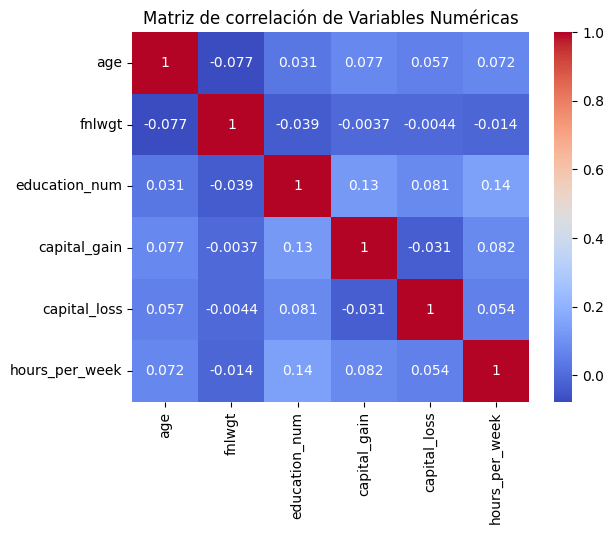

In [16]:
# Seleccionar solo las variables numéricas
numeric_vars = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Crear la matriz de correlación
corr_matrix = adult_data[numeric_vars].corr()

# Crear el gráfico de mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de Variables Numéricas')
plt.show()

Según la matriz de correlaciones notamos que no existe una fuerte correlación entre variables numéricas, no obstante, vemos que tanto las horas semanales como el número de años de educación podrían influenciar a la variable de respuesta 'income'.

# Análisis descriptivo usando la herramienta SweetViz

In [17]:
# !pip install sweetviz

In [18]:
# import sweetviz as sv
# reporte=sv.analyze(adult_data)

In [19]:
# from IPython.display import HTML
# reporte.show_html()
# HTML("SWEETVIZ_REPORT.html")

## Observaciones EDA adult_data Sweetviz

- El grueso de la población tiene entre 20 y 45 años de edad, el promedio está alrededor de los 38 años.
- La clase trabajadora se acumula en su mayoría en el sector privado.
- La mayoría de los individuos tiene un título de High School (bachillerato), seguido de estudios en alguna institución.
- Más del 40% están casados por lo civil y más del 30% nunca se han casado.
- El 67% son hombres, el 33% restante son mujeres.
- Se trabaja en promedio 40 horas semanales.
- El 90% de los registros provienen de Estados Unidos.
- **Es importante resaltar que nuestra variable de respuesta income está desbalanceada: 76%-24% lo cual puede desmejorar nuestras métricas a la hora de las realizar las predicciones, a partir de este hallazgo, es necesario balancear la variable de respuesta en el dataset de entrenamiento.**

## Imputación dataset entrenamiento y prueba

Por otro lado, teniendo en cuenta que las siguientes variables 'workclass', 'occupation', 'native_country' tienen el símbolo: '?' aplicamos la estrategia de imputación por la moda que es el valor más frecuente.

In [20]:
# Conteo de ' ?' por variable en dataset adult_data.

adult_data.isin([' ?']).sum(axis=0)

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
# Imputamos los ' ?' en adult_data.

adult_data.replace(' ?', pd.np.nan, inplace=True)
imputer = SimpleImputer(strategy='most_frequent')
categorical_vars = ['workclass', 'occupation', 'native_country']
adult_data[categorical_vars] = imputer.fit_transform(adult_data[categorical_vars])

<ipython-input-22-b4fef0b2be87>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  adult_data.replace(' ?', pd.np.nan, inplace=True)


In [23]:
# Crear un diccionario de tablas para las 3 variables categóricas.
tables = {}
tables['workclass'] = pd.DataFrame(adult_data['workclass'].value_counts())
tables['occupation'] = pd.DataFrame(adult_data['occupation'].value_counts())
tables['native_country'] = pd.DataFrame(adult_data['native_country'].value_counts())

# Imprimir cada tabla
for table_name, table in tables.items():
    print(f"Tabla para la variable '{table_name}':")
    print(table)
    print()

Tabla para la variable 'workclass':
                   workclass
 Private               36705
 Self-emp-not-inc       3862
 Local-gov              3136
 State-gov              1981
 Self-emp-inc           1695
 Federal-gov            1432
 Without-pay              21
 Never-worked             10

Tabla para la variable 'occupation':
                    occupation
 Prof-specialty           8981
 Craft-repair             6112
 Exec-managerial          6086
 Adm-clerical             5611
 Sales                    5504
 Other-service            4923
 Machine-op-inspct        3022
 Transport-moving         2355
 Handlers-cleaners        2072
 Farming-fishing          1490
 Tech-support             1446
 Protective-serv           983
 Priv-house-serv           242
 Armed-Forces               15

Tabla para la variable 'native_country':
                             native_country
 United-States                        44689
 Mexico                                 951
 Philippines              

Según la imputación anterior, en el dataset completo llamado adult_data fueron reemplazados todos los '?' con la moda de su correspondiente variable. Realizaremos lo mismo para los datasets adult_df (entrenamiento) y adult_test (prueba).

In [24]:
# Imputación adult_df
adult_df.replace(' ?', pd.np.nan, inplace=True)
imputer_df = SimpleImputer(strategy='most_frequent')
categorical_vars_df = ['workclass', 'occupation', 'native_country']
adult_df[categorical_vars_df] = imputer.fit_transform(adult_df[categorical_vars_df])

<ipython-input-24-8c247b20aa2a>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  adult_df.replace(' ?', pd.np.nan, inplace=True)


In [25]:
adult_df.isin([' ?']).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [26]:
# Imputación adult_test
adult_test.replace(' ?', pd.np.nan, inplace=True)
imputer_test = SimpleImputer(strategy='most_frequent')
categorical_vars_test = ['workclass', 'occupation', 'native_country']
adult_test[categorical_vars_test] = imputer.fit_transform(adult_test[categorical_vars_test])

<ipython-input-26-4c45a80001b9>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  adult_test.replace(' ?', pd.np.nan, inplace=True)


In [27]:
adult_test.isin([' ?']).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

## Relaciones entre variables.

Observamos que existe una correlación entre el nivel educativo, las horas trabajadas a la semana y el ingreso, miremos qué sucede si agregamos la variable de la edad.

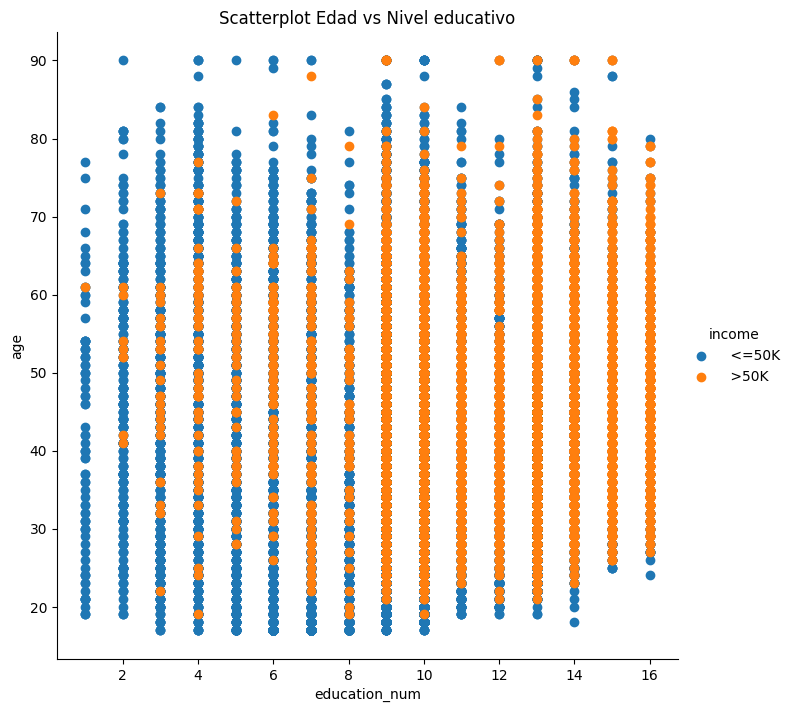

In [28]:
sns.FacetGrid(adult_data, hue="income", height=7)\
    .map(plt.scatter, "education_num","age", )\
    .add_legend()
plt.title('Scatterplot Edad vs Nivel educativo')
plt.show()

Observamos que entre mayor edad se alcanza un mayor nivel educativo, y por ende, existe mayor probabilidad de ganar más de 50K.

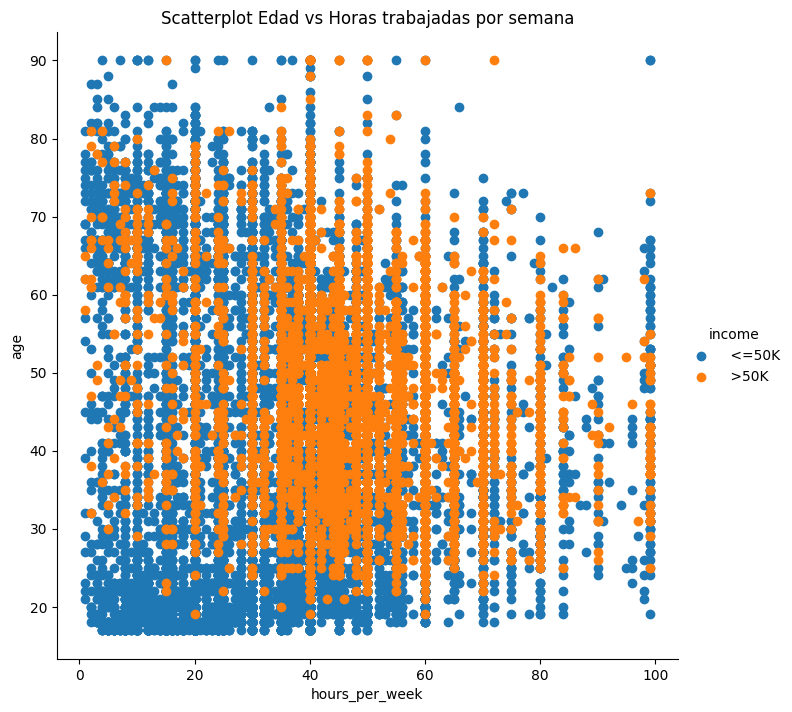

In [29]:
sns.FacetGrid(adult_data, hue="income", height=7)\
    .map(plt.scatter, "hours_per_week","age", )\
    .add_legend()
plt.title('Scatterplot Edad vs Horas trabajadas por semana')
plt.show()

En el anterior gráfico de dispersión observamos que un ingreso más alto es explicado por las personas que trabajan entre 40 y 60 horas a la semana, lo cual quiere decir que más horas trabajadas no implican un mejor salario, sin embargo, una edad inferior a 20 años implica una probabilidad muy alta de ganar menos de 50K.

Sería interesante observar la relación entre nivel educativo y horas trabajadas.

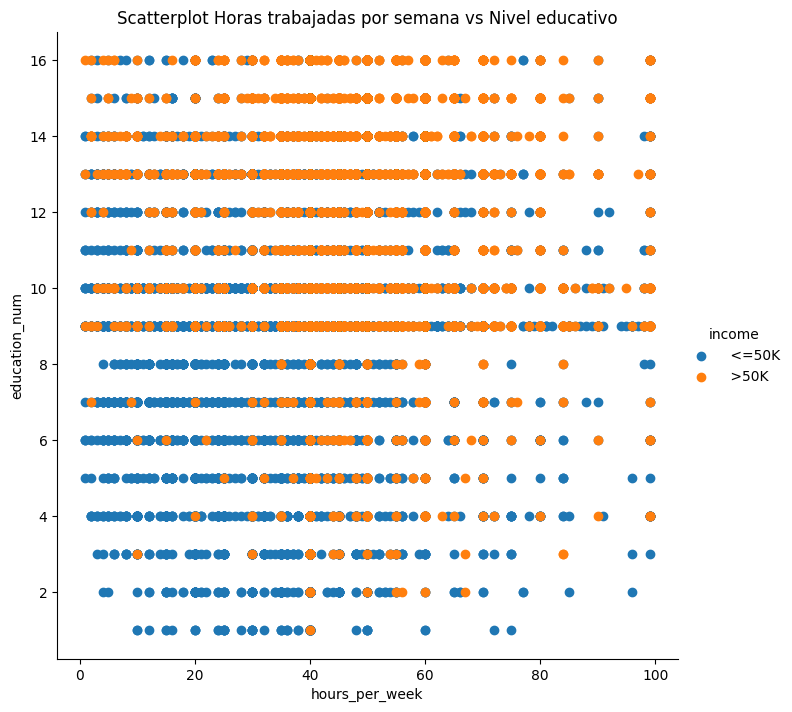

In [30]:
sns.FacetGrid(adult_data, hue="income", height=7)\
    .map(plt.scatter, "hours_per_week","education_num", )\
    .add_legend()
plt.title('Scatterplot Horas trabajadas por semana vs Nivel educativo')
plt.show()

Es evidente que un mayor nivel educativo mejora la probabilidad de ganar más de 50K, trabajando menos horas a la semana.

Observemos ahora la relación frente a la variable income. Para ello realizamos una transformación de la siguiente manera:

- Ingreso menor o igual a 50K = 0.
- Ingreso mayor a 50K = 1.

In [31]:
adult_data["income"]=adult_data["income"].map({" <=50K":0, " >50K": 1}).astype(int)

In [32]:
adult_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [33]:
# reporte1=sv.analyze(adult_data, target_feat="income")

In [34]:
# reporte1.show_html()
# HTML("SWEETVIZ_REPORT.html")

## Observaciones EDA SweetViz contra variable de respuesta income.

- Las personas alrededor de 50 años son las que más ganan.
- Self-employed o 'auto-empleado' es la clase de trabajo con mejores ingresos, seguido de ser empleado del gobierno, pero la mayoría de trabajadores (75%) se encuentran en empleos del sector privado.
- Los niveles educativos con mayores ingresos son prof-school, doctorado y masters, pero la mayoría tienen un título de highschool (bachilletaro).
- Ingresos más altos en estado civil casado, ya sea por lo civil o por las fuerzas armadas.
- La ocupación como executive-managerial o gerente ejecutivo paga muy bien, aproximadamente el 50% de los trabajadores que laboran como gerentes pueden ganar más de 50K al año.
- La población con más ingresos trabaja alrededor de 50 horas semanales.
- Países con mejores ingresos: India, Inglaterra, Canadá, Japón, Italia.
- Países con menores ingresos: Guatemala, República Dominicana, México, El Salvador.


## Correlaciones contra income

<ipython-input-35-a6f6cc8477f4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=adult_data.corr()


<Axes: >

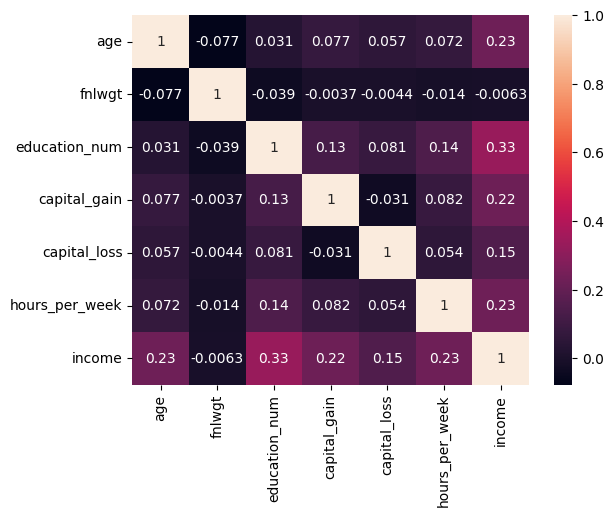

In [35]:
cor=adult_data.corr()
sns.heatmap(cor, annot=True)

A diferencia de la matriz de correlación inicial, en esta matriz agregamos la variale de respuesta income donde observamos que hay una correlación más evidente entre el nivel educativo y el ingreso.

Del siguiente gráfico de densidad podemos observar que casi todas las personas que ganan 50K al año han recibido al menos 8 años de educación. En cuanto al grupo de bajos ingresos, la mayoría de ellos tienen entre 9 y 10 años de educación. Lo interesante es que hay muchas personas con una carrera educativa de largo plazo pero que aún así tienen un ingreso anual bajo. 

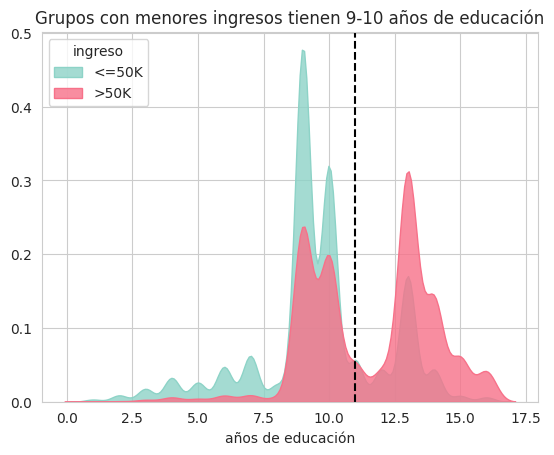

In [36]:
import matplotlib.pyplot as plt

# Seleccionar las observaciones de bajos y altos ingresos 
low_income_data = adult_data[adult_data['income'] == 0]
high_income_data = adult_data[adult_data['income'] == 1]

# Configurar el estilo de la trama
sns.set_style('whitegrid')

# Generar la gráfica de densidad
sns.kdeplot(data=low_income_data, x='education_num', hue='income', alpha=0.8, fill=True, palette='Set3')
sns.kdeplot(data=high_income_data, x='education_num', hue='income', alpha=0.8, fill=True, palette="husl")

plt.axvline(x=11, color='black', linestyle='--')

# Configurar el título y las etiquetas de los ejes
plt.title("Grupos con menores ingresos tienen 9-10 años de educación") 
plt.xlabel("años de educación")
plt.ylabel(None)

plt.legend(title='ingreso', loc='upper left', labels=['<=50K', '>50K'])

El valor de x se establece en 11 porque la variable education_num >50K  se correlaciona con una educación superior, que tiene un valor de education_num de 11 o más en este conjunto de datos. 

El gráfico de cajas y bigotes muestra claramente que los grupos de altos ingresos tienen más años de educación.

<Axes: xlabel='income', ylabel='education_num'>

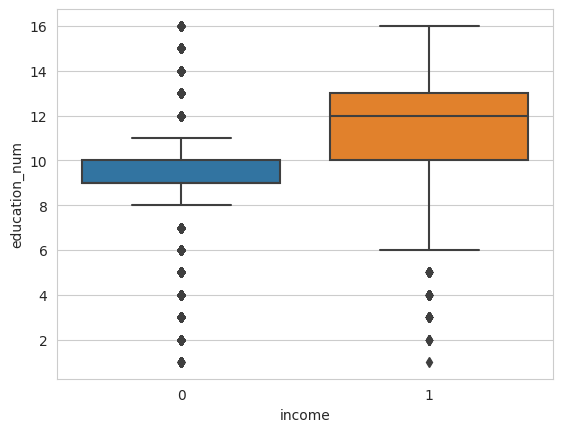

In [37]:
import seaborn as sns

# Generar el gráfico de cajas y bigotes
sns.boxplot(x='income', y='education_num', data=adult_data)

En la siguiente gráfica observamos que la mayor parte de la población gana menos de 50K y es más joven, mientras que la población que gana más de 50K mucho menor y se concentra alrededor de los 45 años de edad.

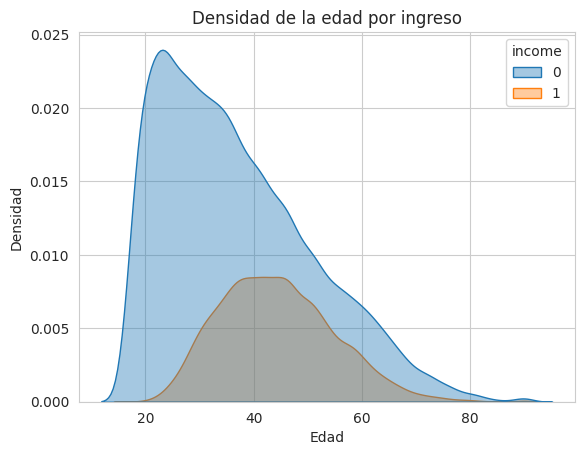

In [38]:
# Crear el gráfico de densidad
sns.kdeplot(data=adult_data, x='age', hue='income', fill=True, alpha=0.4)

# Establecer título y etiquetas de los ejes
plt.title("Densidad de la edad por ingreso")
plt.xlabel("Edad")
plt.ylabel("Densidad")

# Mostrar el gráfico
plt.show()

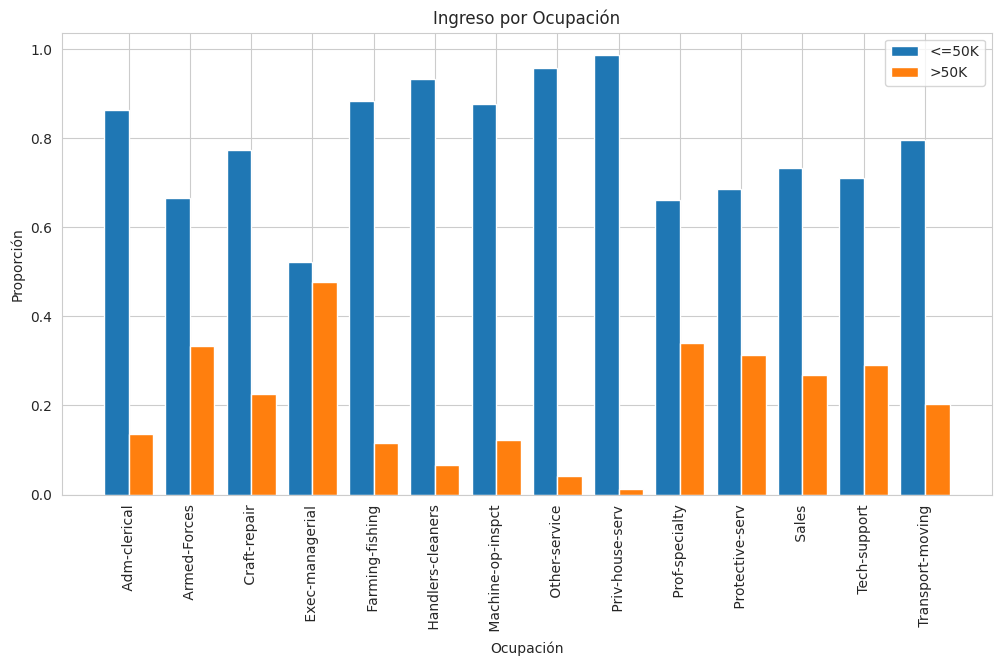

In [39]:
import numpy as np

# Calcular la proporción de personas con ingresos por debajo y por encima de los 50K en cada ocupación
income_by_occupation = adult_data.groupby(['occupation', 'income'])['income'].count().unstack()
income_by_occupation['total'] = income_by_occupation.sum(axis=1)
income_by_occupation['proportion >50K'] = income_by_occupation[1] / income_by_occupation['total']
income_by_occupation['proportion <=50K'] = income_by_occupation[0] / income_by_occupation['total']

# Crear gráfico de barras agrupado
occupations = income_by_occupation.index.tolist()
bar_width = 0.4
x = np.arange(len(occupations))
plt.figure(figsize=(12,6))
plt.bar(x - bar_width/2, income_by_occupation['proportion <=50K'], width=bar_width, label='<=50K')
plt.bar(x + bar_width/2, income_by_occupation['proportion >50K'], width=bar_width, label='>50K')

# Añadir título y etiquetas de los ejes
plt.title('Ingreso por Ocupación')
plt.xlabel('Ocupación')
plt.xticks(x, occupations, rotation=90)
plt.ylabel('Proporción')
plt.legend()

# Mostrar gráfico
plt.show()


Como se mencionó anteriormente, la ocupación como executive-managerial o gerente ejecutivo paga muy bien, aproximadamente el 50% de los trabajadores que laboran como gerentes pueden ganar más de 50K al año.

## Modelado

In [40]:
df1 = adult_data[['age', 'workclass','fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']]

#Setup X and y data
X_data = df1.iloc[:,0:13] 
y_labels = df1.iloc[:,14]

df1.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [41]:
# Observamos la transformación de nuestra variable de respuesta.
y_labels

0        0
1        0
2        0
3        0
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 48842, dtype: int64

## Balanceo de variable de respuesta income

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter


rcParams['figure.figsize'] = 14, 8.7 
# LABELS = ["0","1"]

%matplotlib inline

In [43]:
y_labels.value_counts()

0    37155
1    11687
Name: income, dtype: int64

Observamos a continuación que la variable de respuesta income se encuentra desbalanceada, en un 76% para los individuos que ganan menos de 50K y en 24% para individuos que ganan más de 50K al año, a priori la clase no está muy desbalanceada.

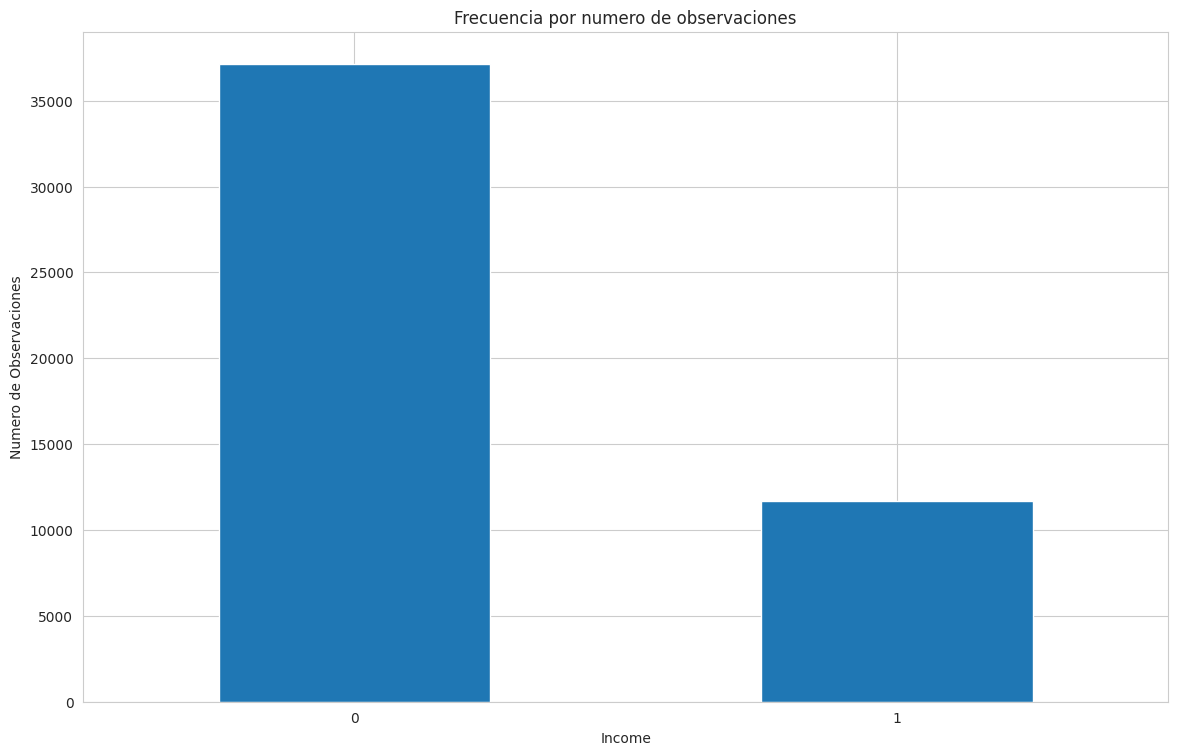

In [44]:
count_classes = pd.value_counts(df1['income'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frecuencia por numero de observaciones")
plt.xlabel("Income")
plt.ylabel("Numero de Observaciones");

### Realizamos la transformación de las variables categóricas a numéricas.

In [45]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 6.0+ MB
None


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["workclass"] = le.fit_transform(df1["workclass"])
df1["education"] = le.fit_transform(df1["education"])
df1["marital_status"] = le.fit_transform(df1["marital_status"])
df1["occupation"] = le.fit_transform(df1["occupation"])
df1["relationship"] = le.fit_transform(df1["relationship"])
df1["race"] = le.fit_transform(df1["race"])
df1["sex"] = le.fit_transform(df1["sex"])
df1["native_country"] = le.fit_transform(df1["native_country"])
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [47]:
#Setup X and y data
X_data = df1.iloc[:,0:13] 
y_labels = df1.iloc[:,14]

In [48]:
X_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40
1,50,5,83311,9,13,2,3,0,4,1,0,0,13
2,38,3,215646,11,9,0,5,1,4,1,0,0,40
3,53,3,234721,1,7,2,5,0,2,1,0,0,40
4,28,3,338409,9,13,2,9,5,2,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,3,215419,9,13,0,9,1,4,0,0,0,36
16277,64,3,321403,11,9,6,9,2,2,1,0,0,40
16278,38,3,374983,9,13,2,9,0,4,1,0,0,50
16279,44,3,83891,9,13,0,0,3,1,1,5455,0,40


In [49]:
y_labels

0        0
1        0
2        0
3        0
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 48842, dtype: int64

### Observemos las métricas del modelo XGBOOST

In [50]:

y = df1['income']
X = df1.drop('income', axis=1)

#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.76, random_state=123) # Partimos la data en la misma proporción del repositorio. 76-24.
 
 # import library
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, y_train)

# predict
pred_y = xgb_model.predict(X_test)

print (classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      8919
           1       0.79      0.66      0.72      2804

    accuracy                           0.88     11723
   macro avg       0.84      0.80      0.82     11723
weighted avg       0.87      0.88      0.87     11723



<Axes: >

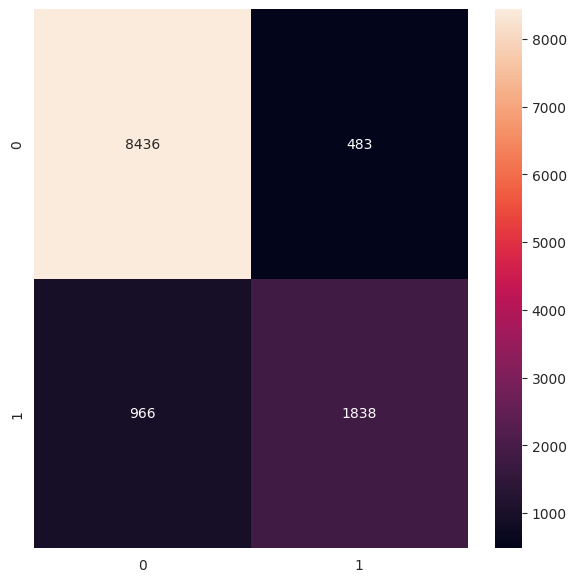

In [51]:
conf_matrix = confusion_matrix(y_test, pred_y)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d")

En este caso el modelo XGBOOST clasifica bien la clase mayoritaria 0; ingresos menores o iguales a 50K, sin embargo, para la clase 1, el modelo identifica incorrectamente 966 observaciones, las está clasificando como 0 cuando en realidad son 1. Esto supone un error significativo de clasificación del modelo.

Hicimos lo anterior para tener un punto de referencia ya que el modelo XGBOOST funciona muy bien generalmente.

### Observemos las métricas del modelo RANDOM FOREST

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# data_0 = data_0.sample(n=9000)

RandomForestClassifier()

In [53]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [54]:
# prediccion
rfc_predict = rfc.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.7766606344083596
Accuracy score: 0.8586539281753818
F1 score: 0.677061001754044


<Axes: >

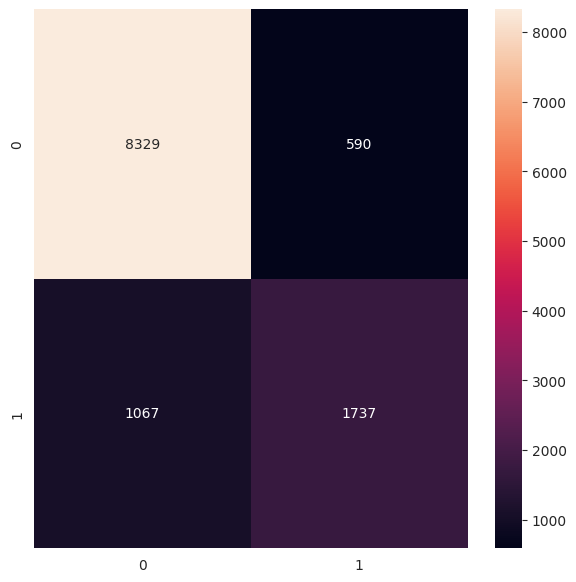

In [55]:
conf_matrix_rf = confusion_matrix(y_test, rfc_predict)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d")

In [56]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8919
           1       0.75      0.62      0.68      2804

    accuracy                           0.86     11723
   macro avg       0.82      0.78      0.79     11723
weighted avg       0.85      0.86      0.85     11723



## Técnica de sobremuestreo minoritario sintético (SMOTE)
Esta técnica genera datos sintéticos para la clase minoritaria.

SMOTE (técnica de sobremuestreo de minorías sintéticas) funciona seleccionando aleatoriamente un punto de la clase minoritaria y calculando los k-vecinos más cercanos para este punto.

In [57]:
import imblearn
from imblearn.over_sampling import SMOTE

In [58]:
smote = SMOTE()

# Ajuste del predicto y variable objetivo
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 37155, 1: 11687})
Resample dataset shape Counter({1: 28236, 0: 28236})


Con la técnica de sobremuestreo SMOTE de imblearn hemos balanceado la data por medio de un sobremuestreo sobre la variable minoritaria.

Esto quiere decir que, el 76% (37155 obs) - 24% (11687 obs) de la partición original se ha balanceado en 50% (28236 obs) - 50% (28236 obs) para la variable de respuesta income pero aplicada a todo el dataset de entrenamiento. 

Observemos:

In [59]:
print(x_smote.shape)

(56472, 14)


In [60]:
x_smote.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,60,1,255711,9,13,6,9,4,4,0,0,0,60,38
1,41,3,115323,15,10,2,11,0,4,1,0,0,40,38
2,56,3,367984,8,11,2,3,0,4,1,15024,0,40,38
3,43,5,126320,11,9,2,3,0,2,1,0,0,40,38
4,34,3,223212,9,13,2,9,0,4,1,0,0,45,28


In [61]:
print(y_smote.shape)

(56472,)


In [62]:
y_smote.head()

0    1
1    1
2    1
3    1
4    0
Name: income, dtype: int64

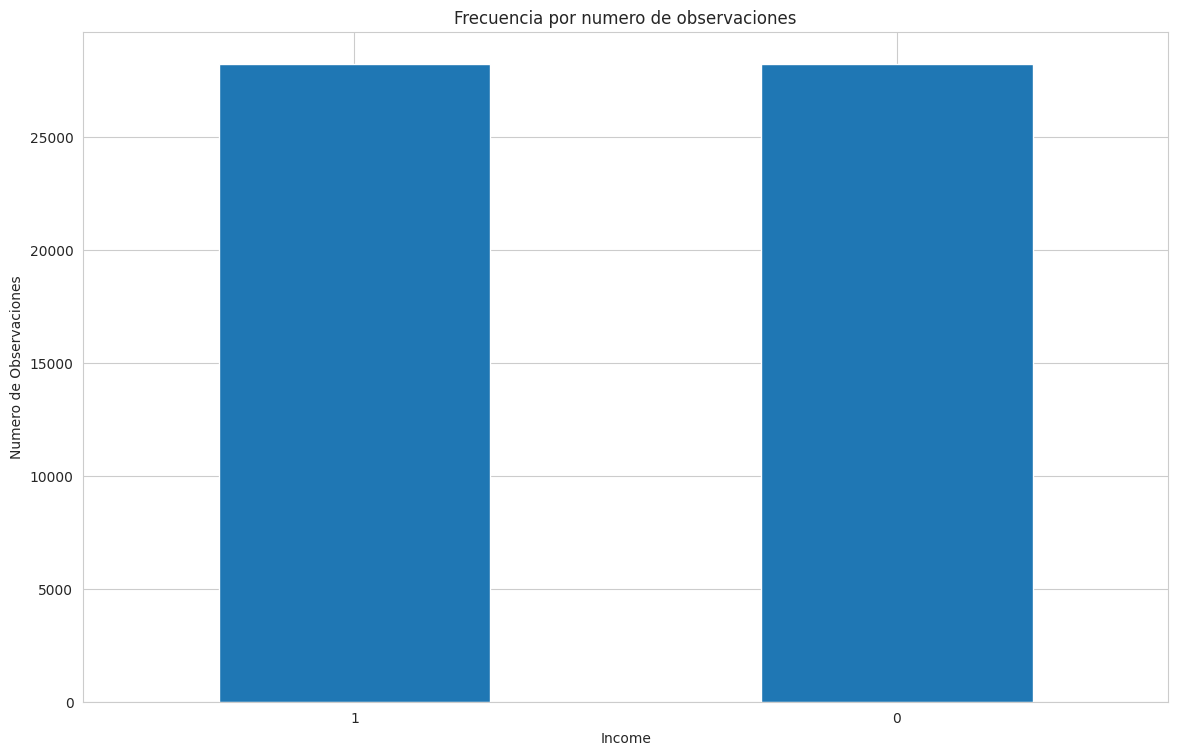

In [63]:
count_classes = pd.value_counts(y_smote, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frecuencia por numero de observaciones")
plt.xlabel("Income")
plt.ylabel("Numero de Observaciones");

## Modelo Naive-Bayes

Se crea el modelo Naive Bayes y ajusta el modelo

In [64]:
from sklearn.naive_bayes import GaussianNB

model_sk = GaussianNB()
model_sk.fit(x_smote, y_smote)

GaussianNB()

Ahora le solicitaremos al modelo que clasifique a qué categoría: 

- 0: <=50K 
- 1: >50K 

pertenecen los siguientes valores:

- age: 60 
- workclass: 1
- fnlwgt: 255711
- education: 9
- education_num: 13
- marital_status: 6 
- occupation: 9
- relationship: 4 
- race: 4
- sex: 0 
- capital_gain: 0
- capital_loss: 0
- hours_per_week: 60
- native_country: 38

Veamos

In [65]:
model_sk.predict([[60, 1, 255711, 9, 13, 6, 9, 4, 4, 0, 0, 0, 60, 38],
                  ])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

Lo anterior significa que está clasificando al individuo como 0, es decir, ingresos <=50K.

In [66]:
model_sk.predict_proba([[60, 1, 255711, 9, 13, 6, 9, 4, 4, 0, 0, 0, 60, 38],
                  ])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([[0.91840508, 0.08159492]])

Probabilidades:

- Para un individuo con esas características, la probabilidad de ser clasificado como 0 es del 91%

## Evaluación del Naive-Bayes 'model_sk'

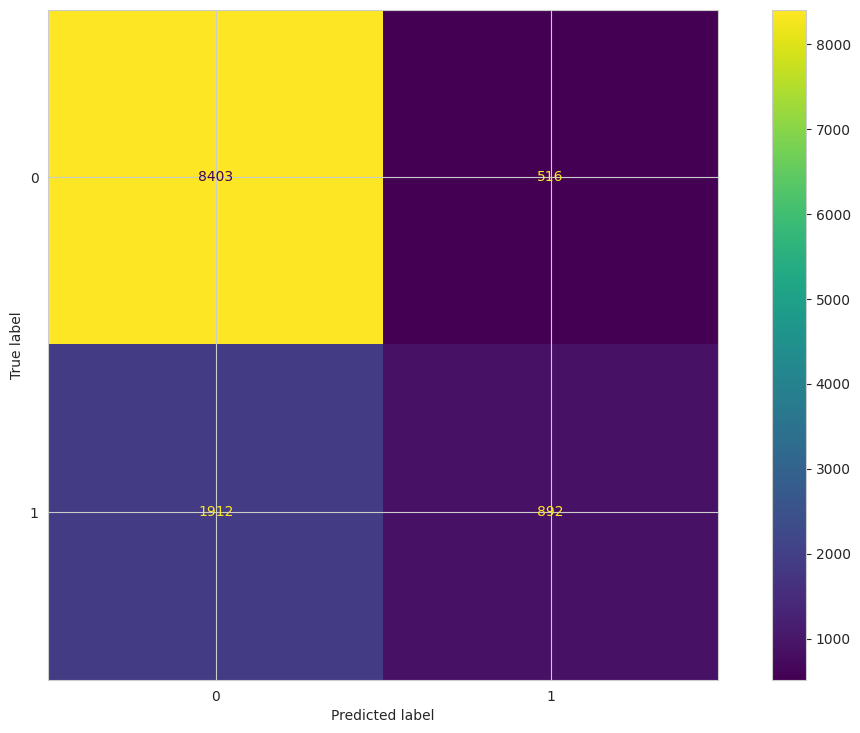

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


# Evaluación de modelo
y_pred = model_sk.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = model_sk.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_sk.classes_)

disp.plot()
plt.show()

Esta matriz de confusión es el resultado de aplicar el modelo Naive-Bayes a la partición del dataset en prueba.

El test es el 24% del total de las obervaciones, es decir, 11723 observaciones.

Este resultado indica que, para la variable 0 (gana menos de 50K) del test (8919 obs) se clasificaron correctamente 8403 obs, es decir, acierta un 94% en la clasificación de la clase 0. Mientras que 516 obs han sido clasificadas incorrectamente.

Por su parte, la variable 1 (gana más de 50K) indica que de 2804 obs del test, han sido clasificadas correctamente 892 obs e incorrectamente 1912, en este caso, para esta categoría (gana más de 50K), el modelo tiene una capacidad predictiva débil.

In [68]:
# Obtenemos las métricas: precisión, recall f1-score y accuracy.

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      8919
           1       0.63      0.32      0.42      2804

    accuracy                           0.79     11723
   macro avg       0.72      0.63      0.65     11723
weighted avg       0.77      0.79      0.77     11723



- La precisión (precision) mide la proporción de instancias positivas predichas correctamente por el modelo. En este caso, la precisión para la clase 0 (income <=50K) es 0.81, lo que significa que el modelo clasificó correctamente el 81% de las instancias que realmente eran de la clase 0. Para la clase 1 (income >50K), la precisión es 0.63, lo que indica que solo el 63% de las instancias clasificadas como 1 realmente son de la clase 1.

- El recall mide la proporción de instancias positivas que el modelo clasifica correctamente como positivas. En este caso, el recall para la clase 0 es 0.94, lo que significa que el modelo identificó correctamente el 95% de las instancias de la clase 0. Para la clase 1, el recall es 0.32, lo que indica que solo el 32% de las instancias de la clase 1 fueron identificadas correctamente por el modelo.

- El F1-score es una medida de la media armónica entre precisión y recall. En este caso, el F1-score para la clase 0 es 0.87 y para la clase 1 es 0.42.

- Por último, la precisión macro promedia las precisión por clase, mientras que el recall macro promedia el recall por clase. La media armónica entre ambas se calcula para obtener el F1-score macro. En este caso, el promedio ponderado de las precisiones es 0.77, el promedio ponderado de los recalls es 0.63 y el F1-score macro es 0.65.

## Límites de decisión del modelo Naive-Bayes

Ahora procedemos a observar gráficamente  los límites de decisión de Naive-Bayes generando un nuevo modelo pero aplicado a tres variables: número de años de educación vs edad, clasificados por el ingreso.

In [69]:
df2 = adult_data[["education_num", "age",'income']]

#Setup X and y data
X_data = df2.iloc[:,0:2]
y_labels = df2.iloc[:,2]

In [70]:
y_labels

0        0
1        0
2        0
3        0
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 48842, dtype: int64

In [71]:
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
model2.fit(X_data, y_labels)

GaussianNB()

In [72]:
import numpy as np

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: 

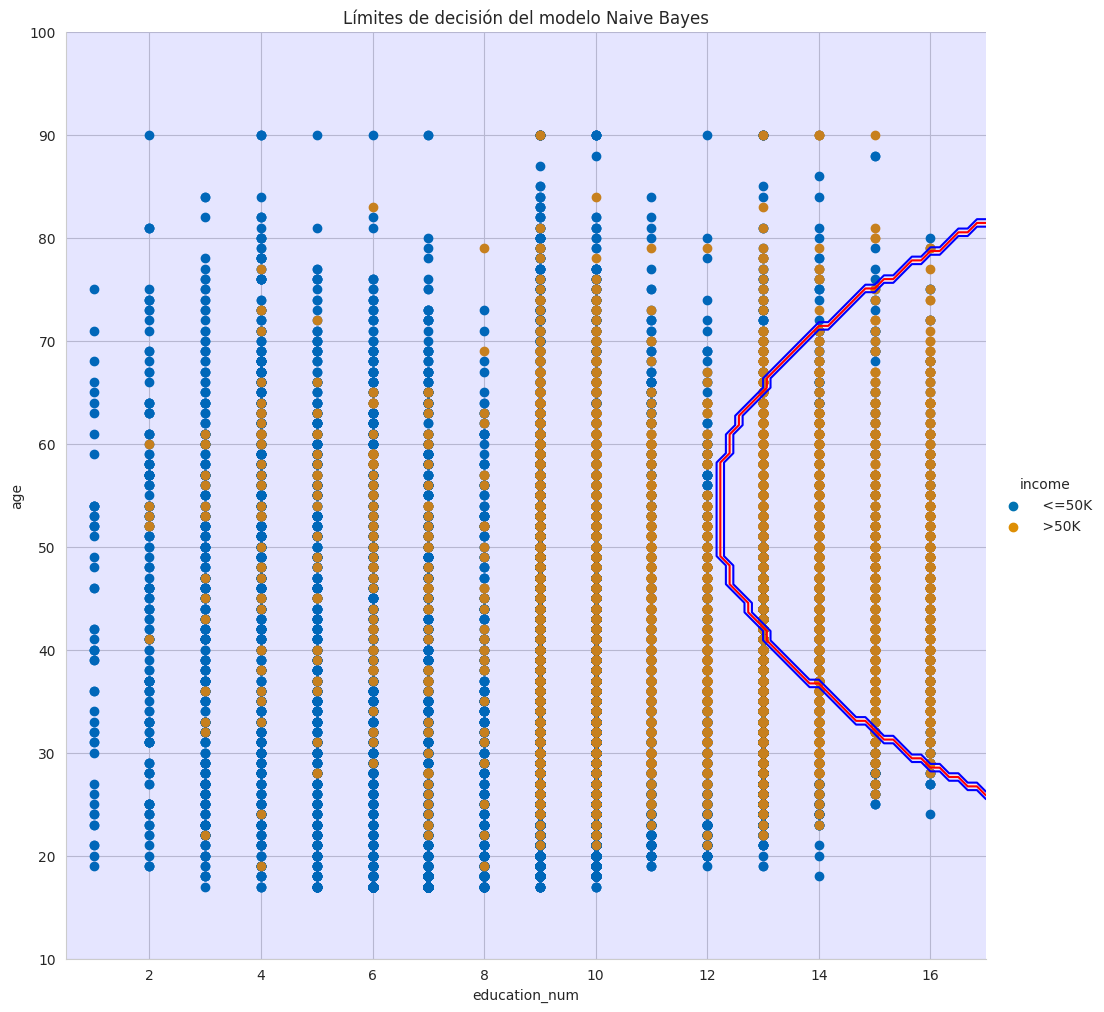

In [73]:
# Se realiza una grilla de 100 puntos 
N = 100
X = np.linspace(0.5, 17, N)
Y = np.linspace(10, 100, N)
X, Y = np.meshgrid(X, Y)

color_list = ['Blues','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(adult_df, hue="income", height=10, palette = 'colorblind')\
    .map(plt.scatter, "education_num", "age",)\
    .add_legend()

my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [model2.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','red'))

# Addd axis and title
my_ax.set_xlabel('education_num')
my_ax.set_ylabel('age')
my_ax.set_title('Límites de decisión del modelo Naive Bayes')

plt.show()

La gráfica 'Límites de decisión del modelo Naive-Bayes' muestra los límites en los cuales las variables 'age' (edad) y education_num (nivel educativo) tienden a ganar más de 50K al año. 

Observamos que los puntos rojos se agrupan en la parte derecha, esto significa que un mayor nivel educativo agrupa a los individuos cuyo ingreso supera los 50K.

## Pycaret

In [74]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.8 MB/s eta 0:00:00


In [75]:
from pycaret.classification import *

In [76]:
df1.shape

(48842, 15)

In [77]:
setup(data=df1, target='income')

,Description,Value
0,Session id,2479
1,Target,income
2,Target type,Binary
3,Original data shape,"(81404, 15)"
4,Transformed data shape,"(276776, 15)"
5,Transformed train set shape,"(193872, 15)"
6,Transformed test set shape,"(82904, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [78]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8120,0.9010,0.5291,0.6219,0.5717,0.4523,0.4547,26.9090
et,Extra Trees Classifier,0.8112,0.8997,0.2506,0.8453,0.3861,0.3113,0.3926,25.0190
dt,Decision Tree Classifier,0.8070,0.8753,0.2344,0.8338,0.3652,0.2913,0.3740,1.2530
knn,K Neighbors Classifier,0.7929,0.8500,0.4421,0.5836,0.5030,0.3754,0.3812,4.7830
xgboost,Extreme Gradient Boosting,0.7907,0.7762,0.2889,0.6276,0.3956,0.2894,0.3213,20.7480
lightgbm,Light Gradient Boosting Machine,0.7859,0.7485,0.2582,0.6156,0.3637,0.2601,0.2957,2.4010
gbc,Gradient Boosting Classifier,0.7813,0.7227,0.2243,0.6048,0.3272,0.2282,0.2684,18.6280
ada,Ada Boost Classifier,0.7778,0.7156,0.1590,0.6233,0.2534,0.1737,0.2304,5.5090
lda,Linear Discriminant Analysis,0.7667,0.6793,0.0659,0.5691,0.1182,0.0725,0.1311,0.6170
ridge,Ridge Classifier,0.7655,0.0000,0.0327,0.6015,0.0620,0.0385,0.0978,0.2080


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [79]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=2479, verbose=0, warm_start=False)


## Conclusiones

- Observamos que a pesar de haber realizado imputación y balanceo de clases con la técnica SMOTE, el modelo Naive-Bayes continúa teniendo una capacidad predictiva débil para los individuos que ganan más de 50K, suponemos que podría deberse a la creación de muestras sintéticas y a la disparidad del número de observaciones reales de la variable de respuesta.

- El modelo XGBOOST es el que arrojó las mejores métricas, observamos que es un modelo rápido, preciso y eficiente.

- El modelo Random Forest tiene mejores métricas que el modelo Naive-Bayes, pero se sitúa por debajo del modelo XGBOOST.

- Pese a no dejar el código en este cuaderno, corrimos el código con una técnica de submuestreo, pero empeoraron las métricas.

- Realizamos un torneo de modelos con Pycaret y nos arrojó que el mejor modelo es Random Forest, no obstante, al comparar las métricas del torneo, estas no coincidieron con las métricas generadas individualmente (XGBOOS, Random Forest).

- Es necesario realizar un análisis descriptivo riguroso, en este proceso saltan a la vista los elementos que se deben limpiar, para este caso los '?', y los puntos al final de la variable de respuesta.

- Quizá retirando la variable 'education' puedan mejorar las métricas, esto porque tanto 'education', como 'education_num' se refieren a la misma información.

In [80]:
# Exportar el dataset a Excel
# adult_data.to_excel('adult_data.xlsx', index=False)